In [4]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from __future__ import division
from operator import truediv
import copy

We now define our variables, N_a and N_b are our populations for species A and B, respectively. 

delta_t is our time step

tau_a and tau_b are our decay time constants for species A and B, repsectively.

steps number of steps of length delta_t over time elapsed T

T is total time elapsed

gamma will be our ration of tau_a/tau_b

If we set time in units of tau_a, t $\rightarrow$ t/tau_a

In [16]:
T = 100  #This is the time window we are looking at for the decay
delta_t = .1 #This is our time step for our discrete time
tau_a = 1 #Decay constant for a
tau_b = .2 #decay constant for b
T=5*tau_b  #I went back and forth on how to define T, and here I tried to use tau_b, this didn't work later
gamma = tau_a/tau_b #gamma, as defined in the homework assignment
steps = T/delta_t #this is the total number of iterations we'd use in the euler method
N_a_int = 150 
N_b_int = 45

In [17]:
N_a = range(int(steps)) #initializing our lists
N_b = range(int(steps))

In [18]:
N_a[0]= 1    #Initial values
N_b[0] = 0

In [19]:
x=1            #this populates our lists
while x < steps:
    N_a[x]=(N_a[x-1]-(delta_t*N_a[x-1]/tau_a))
    x=x+1
x=1
while x < steps:
    N_b[x] = N_b[x-1]+delta_t*(N_a[x-1]/tau_a-N_b[x-1]/tau_b)
    x=x+1

In [20]:
t= np.arange(0,T,delta_t)  #in order to plot our population values, we need to have a time variable

In [21]:
gamstring= 'Gamma of '+ str(gamma) #this allows us to see what gamma we are using in a not very descriptive plot title

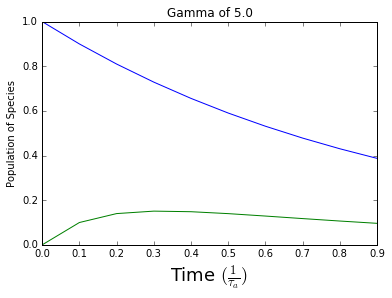

In [22]:
plt.plot(t, N_a, t, N_b)    #Plotting our data
#plt.axis([0,int(T),0,5])
plt.ylabel('Population of Species')
plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
plt.title(gamstring)
plt.show()

In [23]:
    delta_t = .1     #Doing it again, but before I made Tristan said "Make a function", which should have been obvious
    tau_a = 1
    tau_b = 1
    T=5*tau_b
    gamma = tau_a/tau_b
    steps = T/delta_t
    N_a_int = 150
    N_b_int = 45

It's important in this method to make sure steps is a "reasonable" value, else the code won't run

In [6]:
def N_a(delta_t, T):
    tau_a = 1                     #exactly as before, but in a function
    steps = math.ceil(T/delta_t)
    N_a = range(int(steps))
    N_a[0]= 1
    x=1
    while x < int(steps):
        N_a[x]=(N_a[x-1]-(delta_t*N_a[x-1]/tau_a))
        x=x+1
    return N_a

In [7]:
def N_b(delta_t, T, tau_b, N_a):
    tau_a = 1                     #exactly as before, but in a function
    gamma = tau_a/tau_b
    steps = math.ceil(T/delta_t)
    N_b = range(int(steps))
    N_b[0] = 0
    x=1
    while x < int(steps):
        N_b[x] = N_b[x-1]+delta_t*(N_a[x-1]/tau_a-N_b[x-1]/tau_b)
        x=x+1
    return N_b

In [8]:
def decayplot(delta_t, T, tau_b): #this function plots almost any decay given these variables
    
    gamma = 1/tau_b
        
    Na = N_a(delta_t, T)
    Nb = N_b(delta_t, T, tau_b, Na)
    
    t= np.arange(0,T,delta_t)
    gamstring= 'Gamma of '+ str(gamma)
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.semilogy(t, Nb, label=r'$N_B$')
    ax.semilogy(t, Na, label=r'$N_A$')
    
     #obtain the handles and labels from the figure
    handles, labels = ax.get_legend_handles_labels()
    #copy the handles
    handles= [copy.copy(ha) for ha in handles]
    #set the linewidths to the copies
    [ha.set_linewidth(3) for ha in handles]
    #put the copies into the legend
    leg = plt.legend(handles=handles, labels=labels, loc=3)
    
    plt.semilogy(t, Na, t, Nb)
    #plt.axis([0,int(T),0,5])
    plt.ylabel(r'Population of Species (units of $N_{A,0}$)')
    plt.xlabel(r'$t$ (units of $\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show()

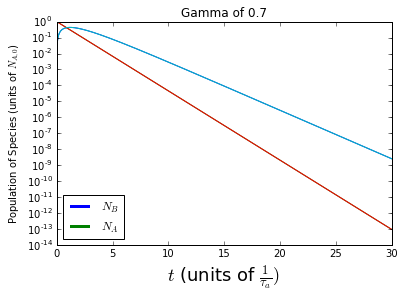

In [49]:
decayplot(.0001, 30, 1/(.7))

In [9]:
def decaycomp(delta_t, T, tau_b): #A function to plot N_b/N_a vs t/tau_a
    tau_a = 1
    gamma = tau_a/tau_b
    steps = math.ceil(T/delta_t)
    Na = N_a(delta_t, T)
    Nb = N_b(delta_t, T, tau_b, Na)
    
    Ncomp = map(truediv, Nb, Na)   #Here is where the difference is, we now have a ratio as time progresses
    t= np.arange(0,T,delta_t)
    gamstring= 'Gamma of '+ str(gamma)
    plt.semilogy(t, Ncomp)
    plt.ylabel('Ratio N_b to N_a')
    plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show()

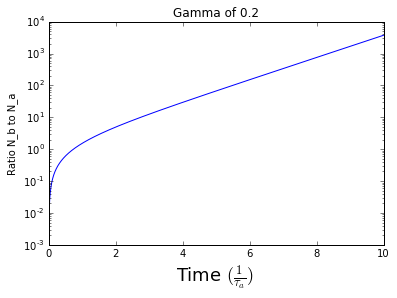

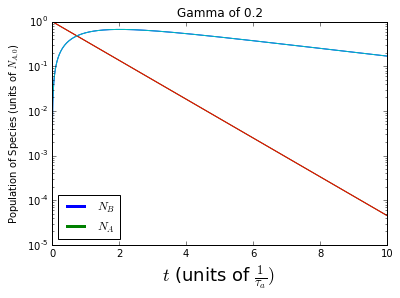

In [21]:
decaycomp(.001, 10, 5)
decayplot(.001, 10, 5)

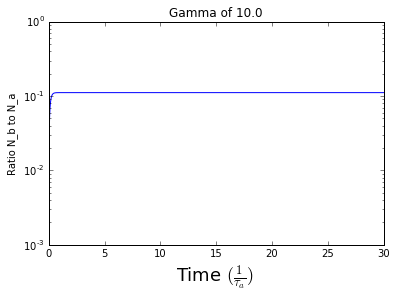

In [39]:
decaycomp(.001, 30, .1)

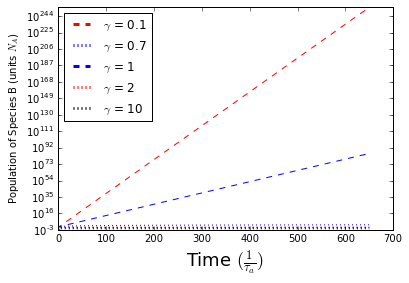

In [92]:
delta_t = .001
T = 650

t = np.arange(0,T, delta_t)

Na = N_a(delta_t, T)
N10 = map(truediv, N_b(delta_t, T, 10, Na),Na)
N5 = map(truediv, N_b(delta_t, T, .5, Na),Na)
N1 = map(truediv, N_b(delta_t, T, 1, Na),Na)
N01 = map(truediv, N_b(delta_t, T, .10, Na),Na)
N55 = map(truediv, N_b(delta_t, T, 1/.7, Na),Na)

fig=plt.figure()
ax=fig.add_subplot(111)
#ax.semilogy(t, np.exp(-t), label='Analytic', linewidth=3.5, c='y')
ax.semilogy(t, N10, 'r--', label=r'$\gamma$ = ' + str(.1))
ax.semilogy(t, N1, 'b:', label=r'$\gamma$ = ' + str(.7))
ax.semilogy(t, N55, 'b--', label=r'$\gamma$ = ' + str(1))
ax.semilogy(t, N5, 'r:', label=r'$\gamma$ = ' + str(2))
ax.semilogy(t, N01, ':', label=r'$\gamma$ = ' + str(10), linewidth=2.5, c='black')

#obtain the handles and labels from the figure
handles, labels = ax.get_legend_handles_labels()
#copy the handles
handles= [copy.copy(ha) for ha in handles]
#set the linewidths to the copies
[ha.set_linewidth(3) for ha in handles]
#put the copies into the legend
leg = plt.legend(handles=handles, labels=labels, loc=2)

gamstring= 'convergence test'


plt.ylabel(r'Population of Species B (units $N_{A}$)')
plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
#plt.title(gamstring)

plt.show()

In [72]:
def decayerrA( T, tau_b):     #This is a bit of a mess, the purpose of this function is to compare our numerical N_A to the analytical
    delta_t = [.3, .1, .001]    #With three different delta_t's the idea was to sample many step sizes
    tau_a = 1
    x=1
    y=0
    gamma = tau_a/tau_b
    
    steps1 = math.ceil(T/delta_t[0])      #But because delta_t varies, the number of steps varies, so there are many lists for each Na/Nb
    N_a1 = N_a(delta_t[0],T)
    N_b1 = N_b(delta_t[0], T, tau_b, N_a1)
    steps2 = math.ceil(T/delta_t[1])
    N_a2 = N_a(delta_t[1], T)
    N_b2 = N_b(delta_t[1], T, tau_b, N_a2)
    steps3 = math.ceil(T/delta_t[2])
    N_a3 = N_a(delta_t[2], T)
    N_b3 = N_b(delta_t[2], T, tau_b, N_a3)
   
    #BUT they all have different time steps, so we need to keep track of that,
    #else our graphs will be very wrong.
    
    t = np.arange(0,T, delta_t[2])
    t1= np.arange(0,T,delta_t[0])
    t2= np.arange(0,T,delta_t[1])
    t3= np.arange(0,T,delta_t[2])
    
    Na = np.exp(-t) #This is our analytic solution for N_A
        
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.semilogy(t, Na, label='Analytic', linewidth=3.5, c='y')
    ax.semilogy(t1, N_a1, 'r--', label=r'$\Delta t$ = ' + str(delta_t[0]))
    ax.semilogy(t2, N_a2, 'b--', label=r'$\Delta t$ = ' + str(delta_t[1]))
    ax.semilogy(t3, N_a3, ':', label=r'$\Delta t$ = ' + str(delta_t[2]), linewidth=2.5, c='black')
    
    #obtain the handles and labels from the figure
    handles, labels = ax.get_legend_handles_labels()
    #copy the handles
    handles= [copy.copy(ha) for ha in handles]
    #set the linewidths to the copies
    [ha.set_linewidth(3) for ha in handles]
    #put the copies into the legend
    leg = plt.legend(handles=handles, labels=labels, loc=3)
    
    gamstring= 'convergence test'

    
    plt.ylabel(r'Population of Species A (units $N_{A,0}$)')
    plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show()
 

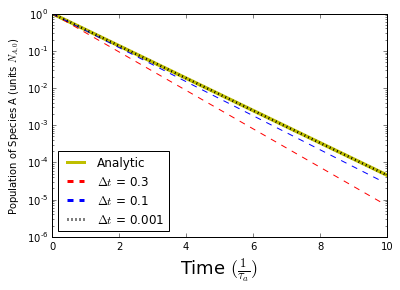

In [73]:
decayerrA( 10, 2) #Gamma of .5

In [53]:
def decayerrB( T, tau_b):     #This is a bit of a mess, the purpose of this function is to compare our numerical N_A to the analytical
    delta_t = [.3, .1, .001]    #With three different delta_t's the idea was to sample many step sizes
    tau_a = 1
    gamma = tau_a/tau_b
    
    steps1 = math.ceil(T/delta_t[0])      #But because delta_t varies, the number of steps varies, so there are many lists for each Na/Nb
    N_a1 = N_a(delta_t[0],T)
    N_b1 = N_b(delta_t[0], T, tau_b, N_a1)
    steps2 = math.ceil(T/delta_t[1])
    N_a2 = N_a(delta_t[1], T)
    N_b2 = N_b(delta_t[1], T, tau_b, N_a2)
    steps3 = math.ceil(T/delta_t[2])
    N_a3 = N_a(delta_t[2], T)
    N_b3 = N_b(delta_t[2], T, tau_b, N_a3)
    
    #BUT they all have different time steps, so we need to keep track of that,
    #else our graphs will be very wrong.
    
    t = np.arange(0,T, delta_t[2])
    t1= np.arange(0,T,delta_t[0])
    t2= np.arange(0,T,delta_t[1])
    t3= np.arange(0,T,delta_t[2])
    
    gamstring= 'convergence test wtih gamma of ' +str(gamma)
    
    if gamma != 1:
        Nb =  (np.exp(-t)-np.exp(-gamma*t))/(gamma-1) #This is our analytic solution for N_B
    if gamma == 1:
        Nb = t* np.exp(-t)
    
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.semilogy(t, Nb, label='Analytic', linewidth=3.5, c='y')
    ax.semilogy(t1, N_b1, 'r--', label=r'$\Delta t$ = ' + str(delta_t[0]))
    ax.semilogy(t2, N_b2, 'b--', label=r'$\Delta t$ = ' + str(delta_t[1]))
    ax.semilogy(t3, N_b3, ':', label=r'$\Delta t$ = ' + str(delta_t[2]), linewidth=2.5, c='black')
    
    #obtain the handles and labels from the figure
    handles, labels = ax.get_legend_handles_labels()
    #copy the handles
    handles= [copy.copy(ha) for ha in handles]
    #set the linewidths to the copies
    [ha.set_linewidth(3) for ha in handles]
    #put the copies into the legend
    leg = plt.legend(handles=handles, labels=labels, loc=3)
    
    plt.ylabel(r'Population of Species B (units $N_{A,0}$)')
    plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show()


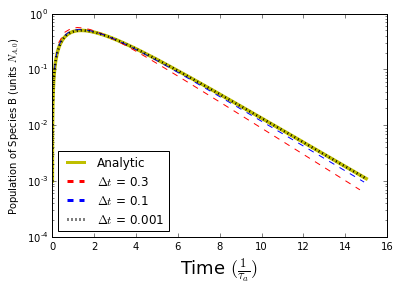

In [54]:
decayerrB( 15, 2)

In [57]:
def abserrB( T, tau_b):     #This is a bit of a mess, the purpose of this function is to compare our numerical N_A to the analytical
    delta_t = .001    #With three different delta_t's the idea was to sample many step sizes
    tau_a = 1
    x=1
    y=0
    gamma = tau_a/tau_b
    
    N_b_int = 0
    N_a_int = 1
    
    #But because delta_t varies, the number of steps varies, so there are many lists for each Na/Nb
    steps3 = math.ceil(T/delta_t)
    N_a3 = N_a(delta_t, T)
    N_b3 = N_b(delta_t, T, tau_b, N_a3)

    t3= np.arange(0,T,delta_t)
    
    gamstring= 'Absolute error of B with gamma of ' +str(gamma)
    
    if gamma != 1:
        Nb = N_b_int/N_a_int*np.exp(-gamma*t3) + (np.exp(-t3)-np.exp(-gamma*t3))/(gamma-1) #This is our analytic solution for N_B
    if gamma == 1:
        Nb = t3* np.exp(-t3)
    
    plt.semilogy(t3, np.abs(N_b3- Nb), 'black', linewidth=1.0)

    
    plt.ylabel(r'Abs. error (units of $N_{A,0}$)')
    plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show()

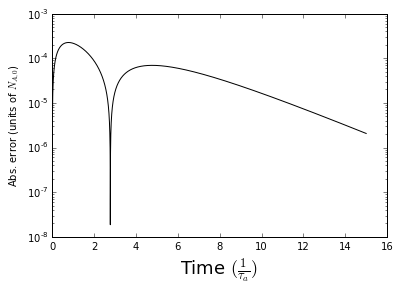

In [58]:
abserrB(15, 2)

In [59]:
def abserrA( T, tau_b):     #This is a bit of a mess, the purpose of this function is to compare our numerical N_A to the analytical
    delta_t = .001   #With three different delta_t's the idea was to sample many step sizes
    tau_a = 1
    gamma = tau_a/tau_b
    
    N_b_int = 0
    N_a_int = 1
    
    #But because delta_t varies, the number of steps varies, so there are many lists for each Na/Nb
    steps3 = math.ceil(T/delta_t)
    N_a3 = N_a(delta_t, T)
    N_b3 = N_b(delta_t, T, tau_b, N_a3)

    t3= np.arange(0,T,delta_t)
    
    gamstring= 'absolute error of A with gamma of ' +str(gamma)
    
    Na =  np.exp(-t3)  #This is our analytic solution for N_A
    
    plt.semilogy(t3, np.abs(N_a3- Na), 'black', linewidth=1.0)
    
    plt.ylabel(r'Abs. error (units of $N_{A,0}$)')
    plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show

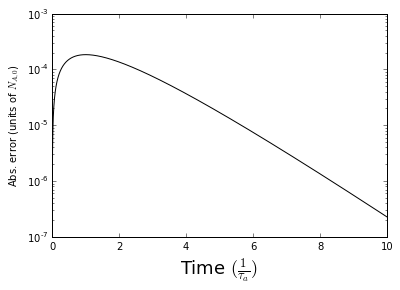

In [60]:
abserrA(10,2)

Now we need percent error, given these absolute errors

In [61]:
def pererrB( T, tau_b):     #This is a bit of a mess, the purpose of this function is to compare our numerical N_A to the analytical
    delta_t = .001  #With three different delta_t's the idea was to sample many step sizes
    tau_a = 1
    x=1
    y=0
    gamma = tau_a/tau_b
    
    N_b_int = 0
    N_a_int = 1
    
    #But because delta_t varies, the number of steps varies, so there are many lists for each Na/Nb
    steps3 = math.ceil(T/delta_t)
    N_a3 = N_a(delta_t, T)
    N_b3 = N_b(delta_t, T, tau_b, N_a3)

    #BUT they all have different time steps, so we need to keep track of that,
    #else our graphs will be very wrong.
    
    t3= np.arange(0,T,delta_t)
    
    gamstring= 'percent error with gamma of ' +str(gamma)
    
    if gamma != 1:
        Nb = N_b_int/N_a_int*np.exp(-gamma*t3) + (np.exp(-t3)-np.exp(-gamma*t3))/(gamma-1) #This is our analytic solution for N_B
    if gamma == 1:
         Nb = t3* np.exp(-t3)
    
    plt.plot(t3, (np.abs(N_b3- Nb))/Nb, 'black', linewidth=1.0)
    
    
    plt.ylabel('percent error')
    plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show()

C:\Program Files\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: invalid value encountered in true_divide


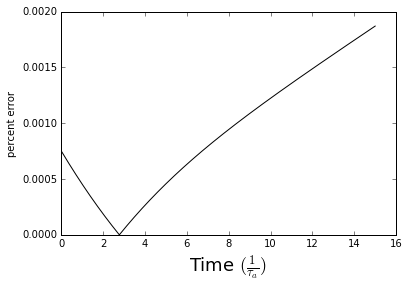

In [62]:
pererrB(15,2)

In [68]:
def pererrA( T, tau_b):     #This is a bit of a mess, the purpose of this function is to compare our numerical N_A to the analytical
    delta_t = .001    #With three different delta_t's the idea was to sample many step sizes
    tau_a = 1
    x=1
    y=0
    gamma = tau_a/tau_b
    
    N_b_int = 0
    N_a_int = 1
    
    #But because delta_t varies, the number of steps varies, so there are many lists for each Na/Nb
    steps3 = math.ceil(T/delta_t)
    N_a3 = N_a(delta_t, T)
    N_b3 = N_b(delta_t, T, tau_b, N_a3)

    #BUT they all have different time steps, so we need to keep track of that,
    #else our graphs will be very wrong.
    
    t3= np.arange(0,T,delta_t)
    
    gamstring= 'percent error of A with gamma of ' +str(gamma)
    
    Na =  np.exp(-t3)  #This is our analytic solution for N_A
    
    plt.plot(t3, np.abs(N_a3- Na)/Na, 'black', linewidth=2.0) #This looks weird
    
    print(steps3)
    
    plt.ylabel('percent error')
    plt.xlabel(r'Time $(\frac{1}{\tau_a})$ ',fontsize=18)
    plt.title(gamstring)
    plt.show()

10000.0


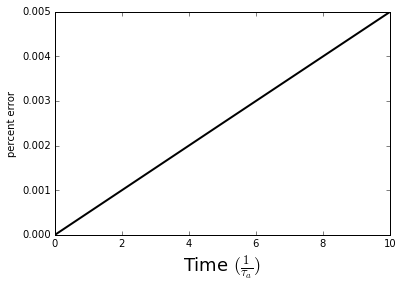

In [69]:
pererrA(10,2)